In [10]:
#Importando librerias
import geopandas as gpd
import matplotlib.pyplot as plt
import zipfile
import os

In [15]:
# Ruta del archivo zip
zip_path = '/content/22_queretaro.zip'

# Descomprimir el archivo zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/sample_data')

In [17]:
# Cargar el shapefile en este primer approach usamos el estado de Querétaro
agebs = gpd.read_file('/content/sample_data/conjunto_de_datos/22a.shp')

# Calcular los centroides y agregarlos al GeoDataFrame
agebs['centroid'] = agebs['geometry'].centroid

# Crear un nuevo GeoDataFrame solo con los centroides
centroides = gpd.GeoDataFrame(agebs['centroid'], geometry='centroid')

# Guardar el nuevo GeoDataFrame
centroides.to_file("centroides_agebs.shp")

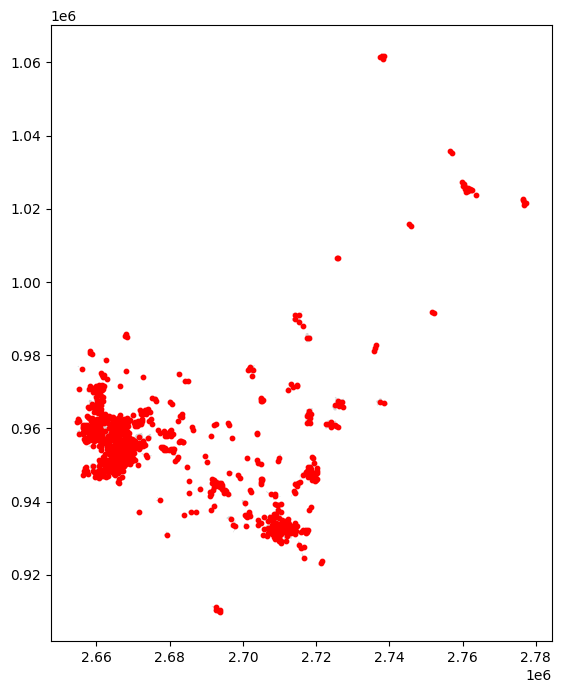

In [18]:
# Visualizar los polígonos y los centroides
fig, ax = plt.subplots(figsize=(10, 8))
agebs.plot(ax=ax, color='lightgray')
centroides.plot(ax=ax, color='red', markersize=10)
plt.show()